In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Flatten
from keras import Model
import keras
import warnings
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Flatten
from keras import Model
import keras
import warnings
import pandas as pd


import numpy as np
import pandas as pd
import warnings
import shutil
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")

In [6]:
triplets_df = pd.read_csv("../triplets.csv")
PATH_TO_IMGS = "../images/"

In [3]:
def build_embedding_generator(k_layers_to_tune=10):

    base_model = tf.keras.applications.ResNet50V2(weights="imagenet", 
                                                      input_shape=(100, 100, 3),
                                                      include_top = False)

    for l in base_model.layers[:-k_layers_to_tune]:
        l.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="sigmoid")(x)
    #x = tf.nn.l2_normalize(x, axis=1)
    
    embedding_model = Model(base_model.input, x, name="Embedding")

    return embedding_model

In [15]:
def load_and_preprocess_image(path):
    
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [100, 100])
    image = image / 255.0
    print(image.shape)
    return image

In [25]:
cossim = keras.metrics.CosineSimilarity()


In [66]:
def display_triplet_with_embs(triplets_df, triplet_id, embedding_model):
    # Load the images


    triplet = triplets_df.iloc[triplet_id]

    
#     anchor_img = mpimg.imread(PATH_TO_IMGS + triplet["anchor"])
#     pos_img = mpimg.imread(PATH_TO_IMGS + triplet["pos"])
#     neg_img = mpimg.imread(PATH_TO_IMGS + triplet["neg"])
    
    anchor_img = load_and_preprocess_image(PATH_TO_IMGS + triplet["anchor"])
    pos_img = load_and_preprocess_image(PATH_TO_IMGS + triplet["pos"])
    neg_img = load_and_preprocess_image(PATH_TO_IMGS + triplet["neg"])
    
    anchor_img = np.expand_dims(anchor_img, axis=0)  # Now shape is (1, 100, 100, 3)
    pos_img = np.expand_dims(pos_img, axis=0)        # Now shape is (1, 100, 100, 3)
    neg_img = np.expand_dims(neg_img, axis=0) 

    anchor_emb = embedding_model.predict(anchor_img)
    pos_emb = embedding_model.predict(pos_img)
    neg_emb = embedding_model.predict(neg_img)
    
    
#     cossim_anch = cossim(anchor_emb, anchor_emb)
#     cossim_pos = cossim(anchor_emb, pos_emb)
#     cossim_neg = cossim(anchor_emb, neg_emb)


    d_anch = tf.reduce_sum(tf.square(anchor_emb - anchor_emb))
    d_pos = tf.reduce_sum(tf.square(anchor_emb - pos_emb))
    d_neg = tf.reduce_sum(tf.square(anchor_emb - neg_emb))
    
    
    fig, axs = plt.subplots(1, 3, figsize=(14, 5))
    
    # Display each image
    axs[0].imshow(anchor_img.reshape(100, 100, 3))  # Assuming the reshape is necessary
    axs[0].set_title(f'Anchor; L2_Distance = {d_anch:.5f}', fontsize=14)  # Corrected formatting
    axs[0].axis('off') 

    axs[1].imshow(pos_img.reshape(100, 100, 3))
    axs[1].set_title(f'Positive; L2_Distance = {d_pos:.5f}', fontsize=14)  # Consistent formatting
    axs[1].axis('off')  

    axs[2].imshow(neg_img.reshape(100, 100, 3))
    axs[2].set_title(f'Negative ; L2_Distance = {d_neg:.5f}', fontsize=14)  # Consistent formatting
    axs[2].axis('off')   
    
    plt.show()

In [60]:
embedding_model = build_embedding_generator(15)

embedding_model.load_weights("resnet50v2_embeddings_baseline_weights.h5")

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 55ms/step


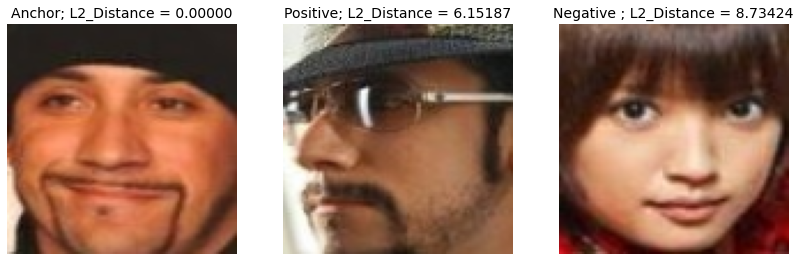

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 59ms/step


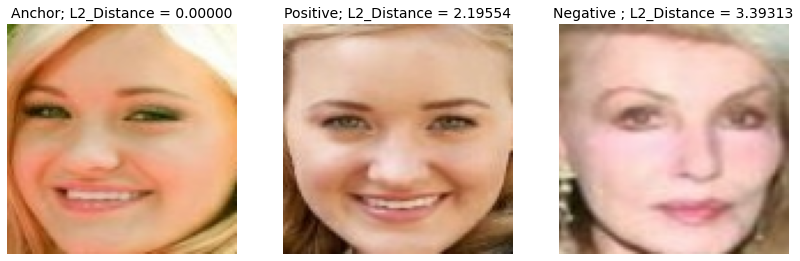

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 59ms/step


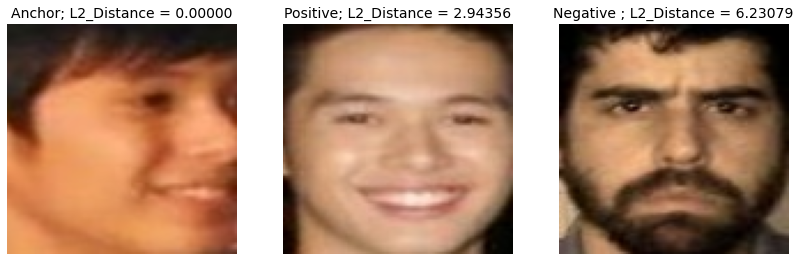

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 54ms/step


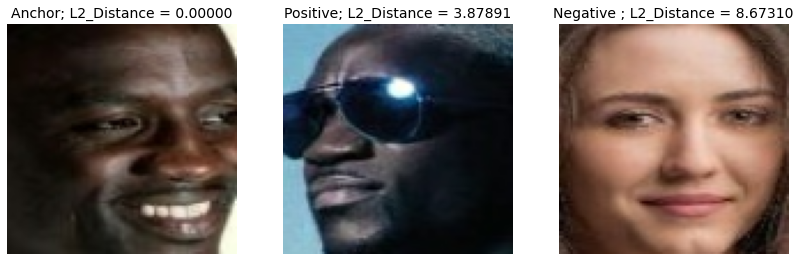

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 57ms/step


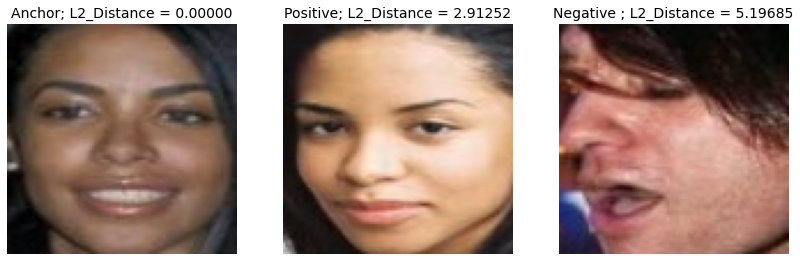

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 56ms/step


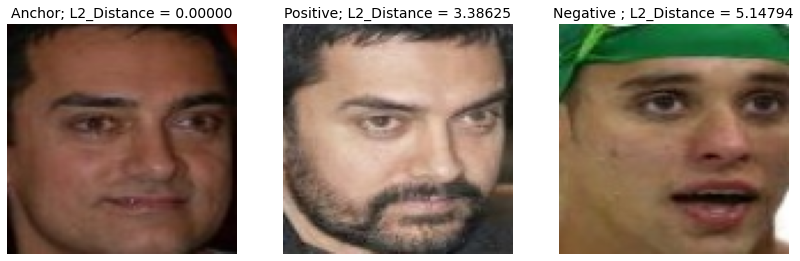

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 56ms/step


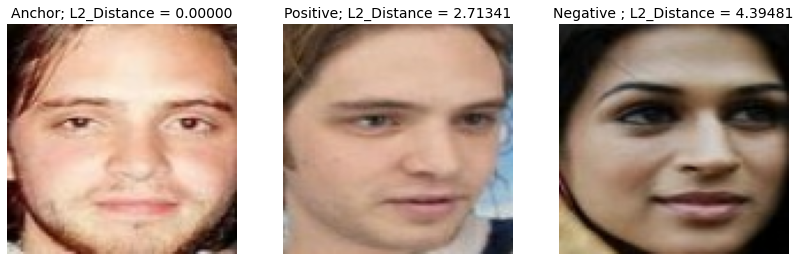

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 52ms/step


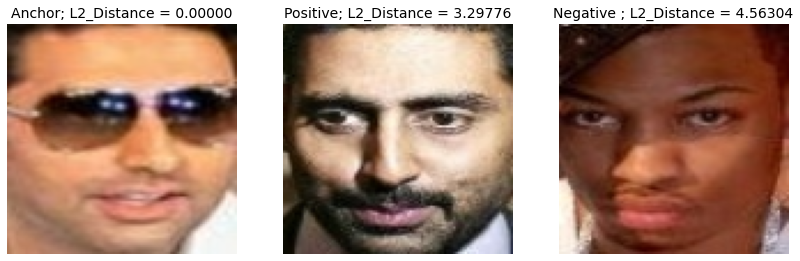

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 55ms/step


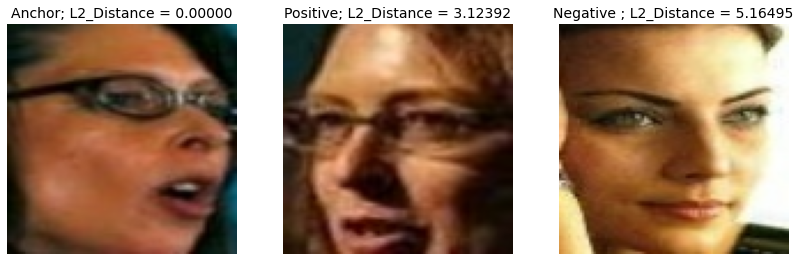

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 54ms/step


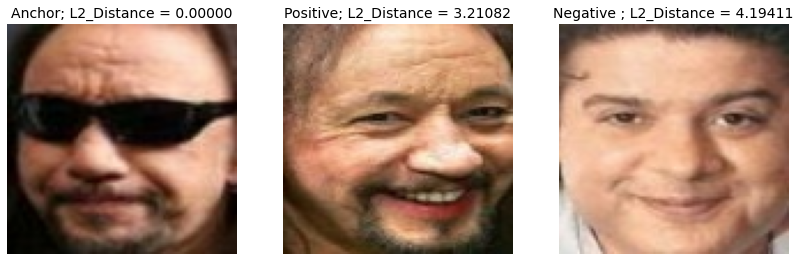

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
1/1 [==============================] - 0s 53ms/step


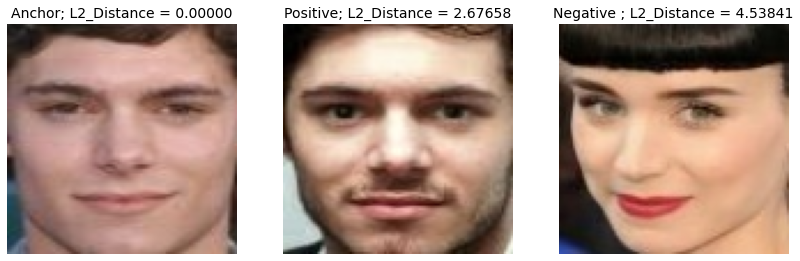

In [67]:
display_triplet_with_embs(triplets_df, 2, embedding_model)
display_triplet_with_embs(triplets_df, 5, embedding_model)
display_triplet_with_embs(triplets_df, 6, embedding_model)
display_triplet_with_embs(triplets_df, 9, embedding_model)
display_triplet_with_embs(triplets_df, 15, embedding_model)
display_triplet_with_embs(triplets_df, 17, embedding_model)
display_triplet_with_embs(triplets_df, 30, embedding_model)
display_triplet_with_embs(triplets_df, 50, embedding_model)
display_triplet_with_embs(triplets_df, 60, embedding_model)
display_triplet_with_embs(triplets_df, 70, embedding_model)
display_triplet_with_embs(triplets_df, 80, embedding_model)

